<a href="https://colab.research.google.com/github/AstronAlways/titan/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Introduction to Logistic regression**

We are trying to predict a classification, survival or decease and we are solving this as a logistical regression classification problem

**Importing Libraries**

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [ ]:
train = pd.read_csv('/content/titanic_train.csv')

In [ ]:
train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [ ]:
train.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [ ]:
train.shape


(891, 12)

In [ ]:
train.tail(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.00,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.00,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.45,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.00,C148,C
890,891,0,3,"Dooley, Mr. Patrick",male,32.0,0,0,370376,7.75,NaN,Q


In [ ]:
train.sample(4)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
371,372,0,3,"Wiklund, Mr. Jakob Alfred",male,18.0,1,0,3101267,6.4958,NaN,S
40,41,0,3,"Ahlin, Mrs. Johan (Johanna Persdotter Larsson)",female,40.0,1,0,7546,9.4750,NaN,S
882,883,0,3,"Dahlberg, Miss. Gerda Ulrika",female,22.0,0,0,7552,10.5167,NaN,S
236,237,0,2,"Hold, Mr. Stephen",male,44.0,1,0,26707,26.0000,NaN,S


**Exploratory data analysis**


We begin exploratory data analysis, We'll start by checking out missing data

<Axes: >

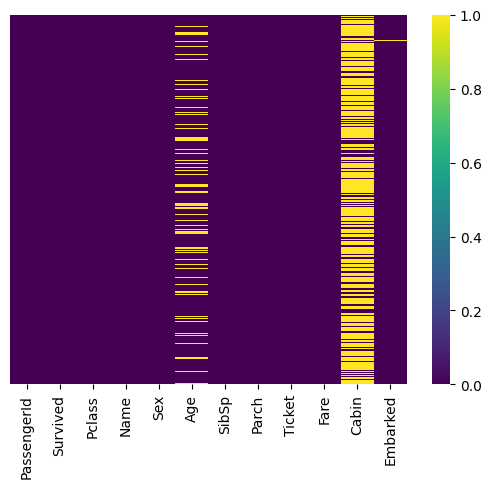

In [ ]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=True,cmap='viridis')

In [ ]:
train['Age'].mean()


29.69911764705882

In [ ]:
train['Fare'].mean()

32.204207968574636

Rougly 20 percent of the age data is missing. The proprotion of the age missing is likely small enough for reasonable replacement with some form of imputation

<ipython-input-12-c44fa4ada709>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Survived',data=train, palette='magma')


<Axes: xlabel='Survived', ylabel='count'>

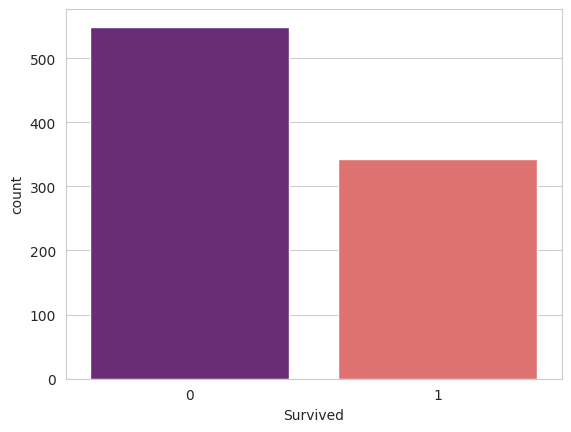

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',data=train, palette='magma')

<Axes: xlabel='Survived', ylabel='count'>

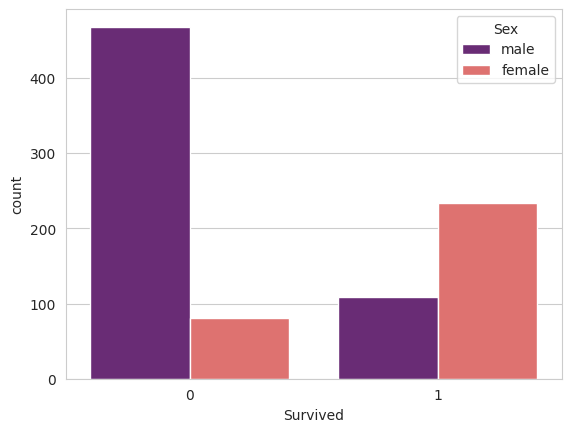

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Sex',data=train, palette='magma')

<Axes: xlabel='Survived', ylabel='count'>

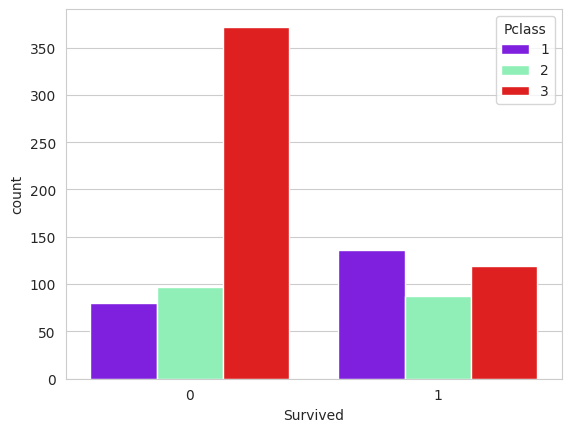

In [ ]:
sns.set_style('whitegrid')
sns.countplot(x='Survived',hue='Pclass',data=train, palette='rainbow')

<ipython-input-15-844013201685>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=10)


<Axes: xlabel='Age', ylabel='Density'>

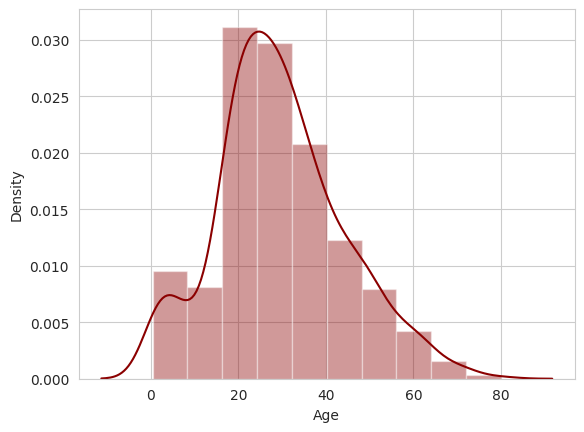

In [ ]:
sns.distplot(train['Age'].dropna(),kde=True,color='darkred',bins=10)

<Axes: xlabel='SibSp', ylabel='count'>

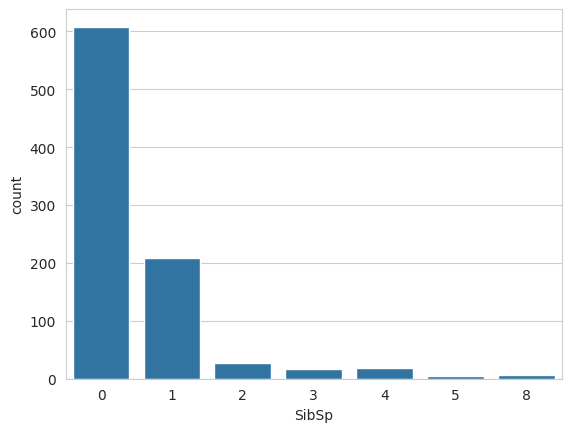

In [ ]:
sns.countplot(x='SibSp',data=train)

<ipython-input-17-1d790451b5d1>:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train['Fare'],kde=True,color='darkred',bins=10)


<Axes: xlabel='Fare', ylabel='Density'>

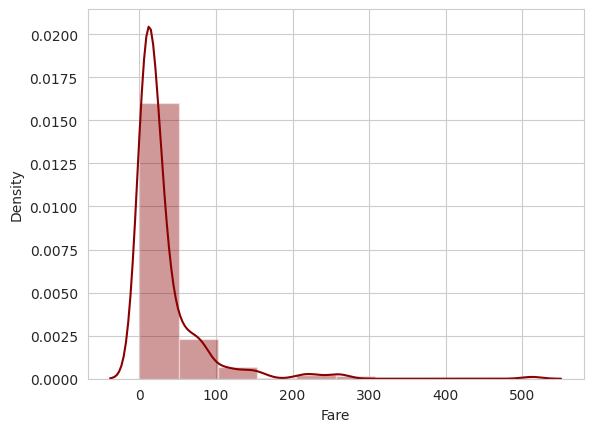

In [ ]:
sns.distplot(train['Fare'],kde=True,color='darkred',bins=10)

Data cleaning

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(train.drop('Survived',axis=1),
                                                    train['Survived'], test_size=0.30,
                                                    random_state=101)

In [ ]:
X_train.shape


(623, 11)

In [ ]:
from sklearn.linear_model import LogisticRegression
logmodel = LogisticRegression()
logmodel

LogisticRegression()

In [ ]:
X_train.info


<bound method DataFrame.info of      PassengerId  Pclass                                             Name  \
520          521       1                            Perreault, Miss. Anne   
510          511       3                         Daly, Mr. Eugene Patrick   
446          447       2                Mellinger, Miss. Madeleine Violet   
2              3       3                           Heikkinen, Miss. Laina   
691          692       3                               Karun, Miss. Manca   
..           ...     ...                                              ...   
575          576       3                             Patchett, Mr. George   
838          839       3                                  Chip, Mr. Chang   
337          338       1                  Burns, Miss. Elizabeth Margaret   
523          524       1  Hippach, Mrs. Louis Albert (Ida Sophia Fischer)   
863          864       3                Sage, Miss. Dorothy Edith "Dolly"   

        Sex   Age  SibSp  Parch            Ticket      Fare Cabin Embarked  
520  female  30.0      0      0             12749   93.5000   B73        S  
510    male  29.0      0      0            382651    7.7500   NaN        Q  
446  female  13.0      0      1            250644   19.5000   NaN        S  
2    female  26.0      0      0  STON/O2. 3101282    7.9250   NaN        S  
691  female   4.0      0      1            349256   13.4167   NaN        C  
..      ...   ...    ...    ...               ...       ...   ...      ...  
575    male  19.0      0      0            358585   14.5000   NaN        S  
838    male  32.0      0      0              1601   56.4958   NaN        S  
337  female  41.0      0      0             16966  134.5000   E40        C  
523  female  44.0      0      1            111361   57.9792   B18        C  
863  female   NaN      8      2          CA. 2343   69.5500   NaN        S  

[623 rows x 11 columns]>

In [ ]:
logmodel.fit(X_train,y_train)

ValueError: could not convert string to float: 'Perreault, Miss. Anne'